In [2]:
unzip_path = "./dataset/"

In [3]:
from io import BytesIO
from urllib.request import urlopen
from zipfile import ZipFile
import os
import pandas as pd

# data_url = "https://dshare.mathematik.uni-marburg.de/index.php/s/GrPtczNmDZQcn9f/download/training_dataset.zip"

# with urlopen(data_url) as zipresp:
#     with ZipFile(BytesIO(zipresp.read())) as zfile:
#         zfile.extractall(unzip_path)
        
print('Dataset extracted to "{:s}"'.format(os.path.realpath(unzip_path)))
df = pd.read_csv('dataset/train.csv', index_col='Id')
df.head(5)

Dataset extracted to "/workspaces/ml_hackathon/dataset"


,Wohngebiet,Nachbarschaft,Bedingung1,Bedingung2,Wohnungsklasse,Gebauedetyp,Wohnungsstil,Baujahr,Umbaujahr,Hausqualitaet,...,Garagenqualitaet,Garagenzustand,EinfahrtGepflastert,Sondermerkmal,SondermerkmalWert,Verkaufsmonat,Verkaufsjahr,Verkaufstyp,Verkaufsbedingung,Verkaufspreis
Id,,,,,,,,,,,,,,,,,,,,,
1,WN,Gallus,Norm,Norm,20,1Fam,1Sto,1962,1962,3,...,Du,Ar,J,NaN,0.0,7,2019,GarK,Normal,69700.0
2,WN,Gallus,Norm,Norm,20,1Fam,1Sto,2015,2016,5,...,Du,Du,J,NaN,0.0,6,2017,GarK,Normal,133450.0
3,WN,Eckenhe,Norm,Norm,50,1Fam,2Sto,1930,1960,6,...,Du,Du,P,NaN,0.0,9,2016,GarK,Normal,165750.0
4,WN,Ginnhei,Norm,Norm,60,1Fam,2Sto,2009,2010,6,...,Du,Du,J,NaN,0.0,5,2017,GarK,Normal,157250.0
5,WN,Eckenhe,Norm,Norm,70,1Fam,2Sto,1939,1960,8,...,Du,Du,J,NaN,0.0,6,2016,GarK,Normal,195500.0


In [4]:
features = df.columns[:-1]
features_20_1, features_20_2, features_20_3, features_19_4 = features[:20], features[20:40], features[40:60], features[60:]

df_20_1 = pd.concat([df[features_20_1], df['Verkaufspreis']], axis=1)
df_20_2 = pd.concat([df[features_20_2], df['Verkaufspreis']], axis=1)
df_20_3 = pd.concat([df[features_20_3], df['Verkaufspreis']], axis=1)
df_20_4 = pd.concat([df[features_19_4], df['Verkaufspreis']], axis=1)

In [5]:
pd.options.display.max_rows = 85
pd.options.display.max_columns = 85
df_20_2.describe(include='all')

,Fundament,Mauerwerktyp,Mauerwerkflaeche,Verkleidung1,Verkleidung2,Dachtyp,Dachmaterial,Aussenmaterialqualitaet,Aussenmaterialzustand,Kellerhoehe,Kellerzustand,Kellerbelichtung,Kellerbereich1,Kellerbereichgroesse1,Kellerbereich2,Kellerbereichgroesse2,KellerbereichgroesseNAu,KellerbereichgroesseGes,KellerVollbadezimmer,KellerHalbbadezimmer,Verkaufspreis
count,2000,1986,1986.000000,2000,2000,2000,2000,2000,2000,1935,1935,1934,1937,1999.000000,1937,1999.000000,1999.000000,1999.000000,1998.000000,1998.000000,2000.00000
unique,6,4,NaN,14,15,6,6,4,5,4,4,4,6,NaN,6,NaN,NaN,NaN,NaN,NaN,NaN
top,BetonGeg,Kein,NaN,Vinyl,Vinyl,Giebel,VerbSch,Du,Du,Ty,Ty,Ke,GWR,NaN,NAu,NaN,NaN,NaN,NaN,NaN,NaN
freq,906,1190,NaN,699,696,1579,1973,1220,1739,861,1769,1296,593,NaN,1707,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,9.060906,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.641016,NaN,4.287899,49.829655,93.758569,0.421922,0.056557,153708.42060
std,NaN,NaN,15.776509,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.240276,NaN,14.681256,38.799414,40.553955,0.519678,0.233208,68822.30926
min,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,10870.65000
25%,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,20.070000,70.200000,0.000000,0.000000,109650.00000
50%,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.390000,NaN,0.000000,41.400000,88.920000,0.000000,0.000000,136000.00000
75%,NaN,NaN,14.760000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.385000,NaN,0.000000,71.280000,115.200000,1.000000,0.000000,181475.00000


# Analyze Flow

### Keller:
- Kellerhöhe,Kellerzustand,Kellerbelichtung, Kellerbereich1, Kellerbereich2 -> fehlende Werte zu NA ändern

- Kellerbereichgroesse1,Kellerbereichgroesse2,KellerbereichgroesseGes,KellerbereichgroesseNau,KellerVollbadezimmer,KellerHalbbadezimmer -> fehlende Werte mit 0.0 auffüllen

- Kellerbereichgroesse2 -> viele Werte 0 da kein zweiter Keller und Korrelation 0.025 -> löschen?

### Mauerwerktyp und Mauerwerkfläche
- bei 14 Datensätze fehlen beide Werte -> zu "Kein" und 0 ändern
-

### Dachmaterial:
- evtl löschen, da 1973 mal selber wert
- Außerdem hat das Feature keine Korrelation mit irgendeinem anderen Feature, und auch keine der Werte mit dem Verkaufspreis

### Aussenmaterialzustand

- 1739 Werte sind DU (durchschnittlich) -> trozdem beibehalten

## Ausreißer

- wenige, viele bei Keller2, da viele 0 Werte...

In [6]:
import matplotlib.pyplot as plt

def plot_feature(df, feature):
    plt.figure(figsize=(10, 5))
    plt.scatter(df[feature], df['Verkaufspreis'])
    plt.xlabel(feature)
    plt.ylabel('Verkaufspreis')
    plt.show()

In [7]:
def plot_all_features(df):
    plt.figure(figsize=(20, 20))
    for i, feature in enumerate(df.columns):
        # delete empty values
        df = df[df[feature].notnull()]
        try:
            plt.subplot(5, 4, i+1)
            plt.scatter(df[feature], df['Verkaufspreis'])
            plt.xlabel(feature)
            plt.ylabel('Verkaufspreis')
        except Exception as e:
            print(e)
    plt.show()

num must be an integer with 1 <= num <= 20, not 21


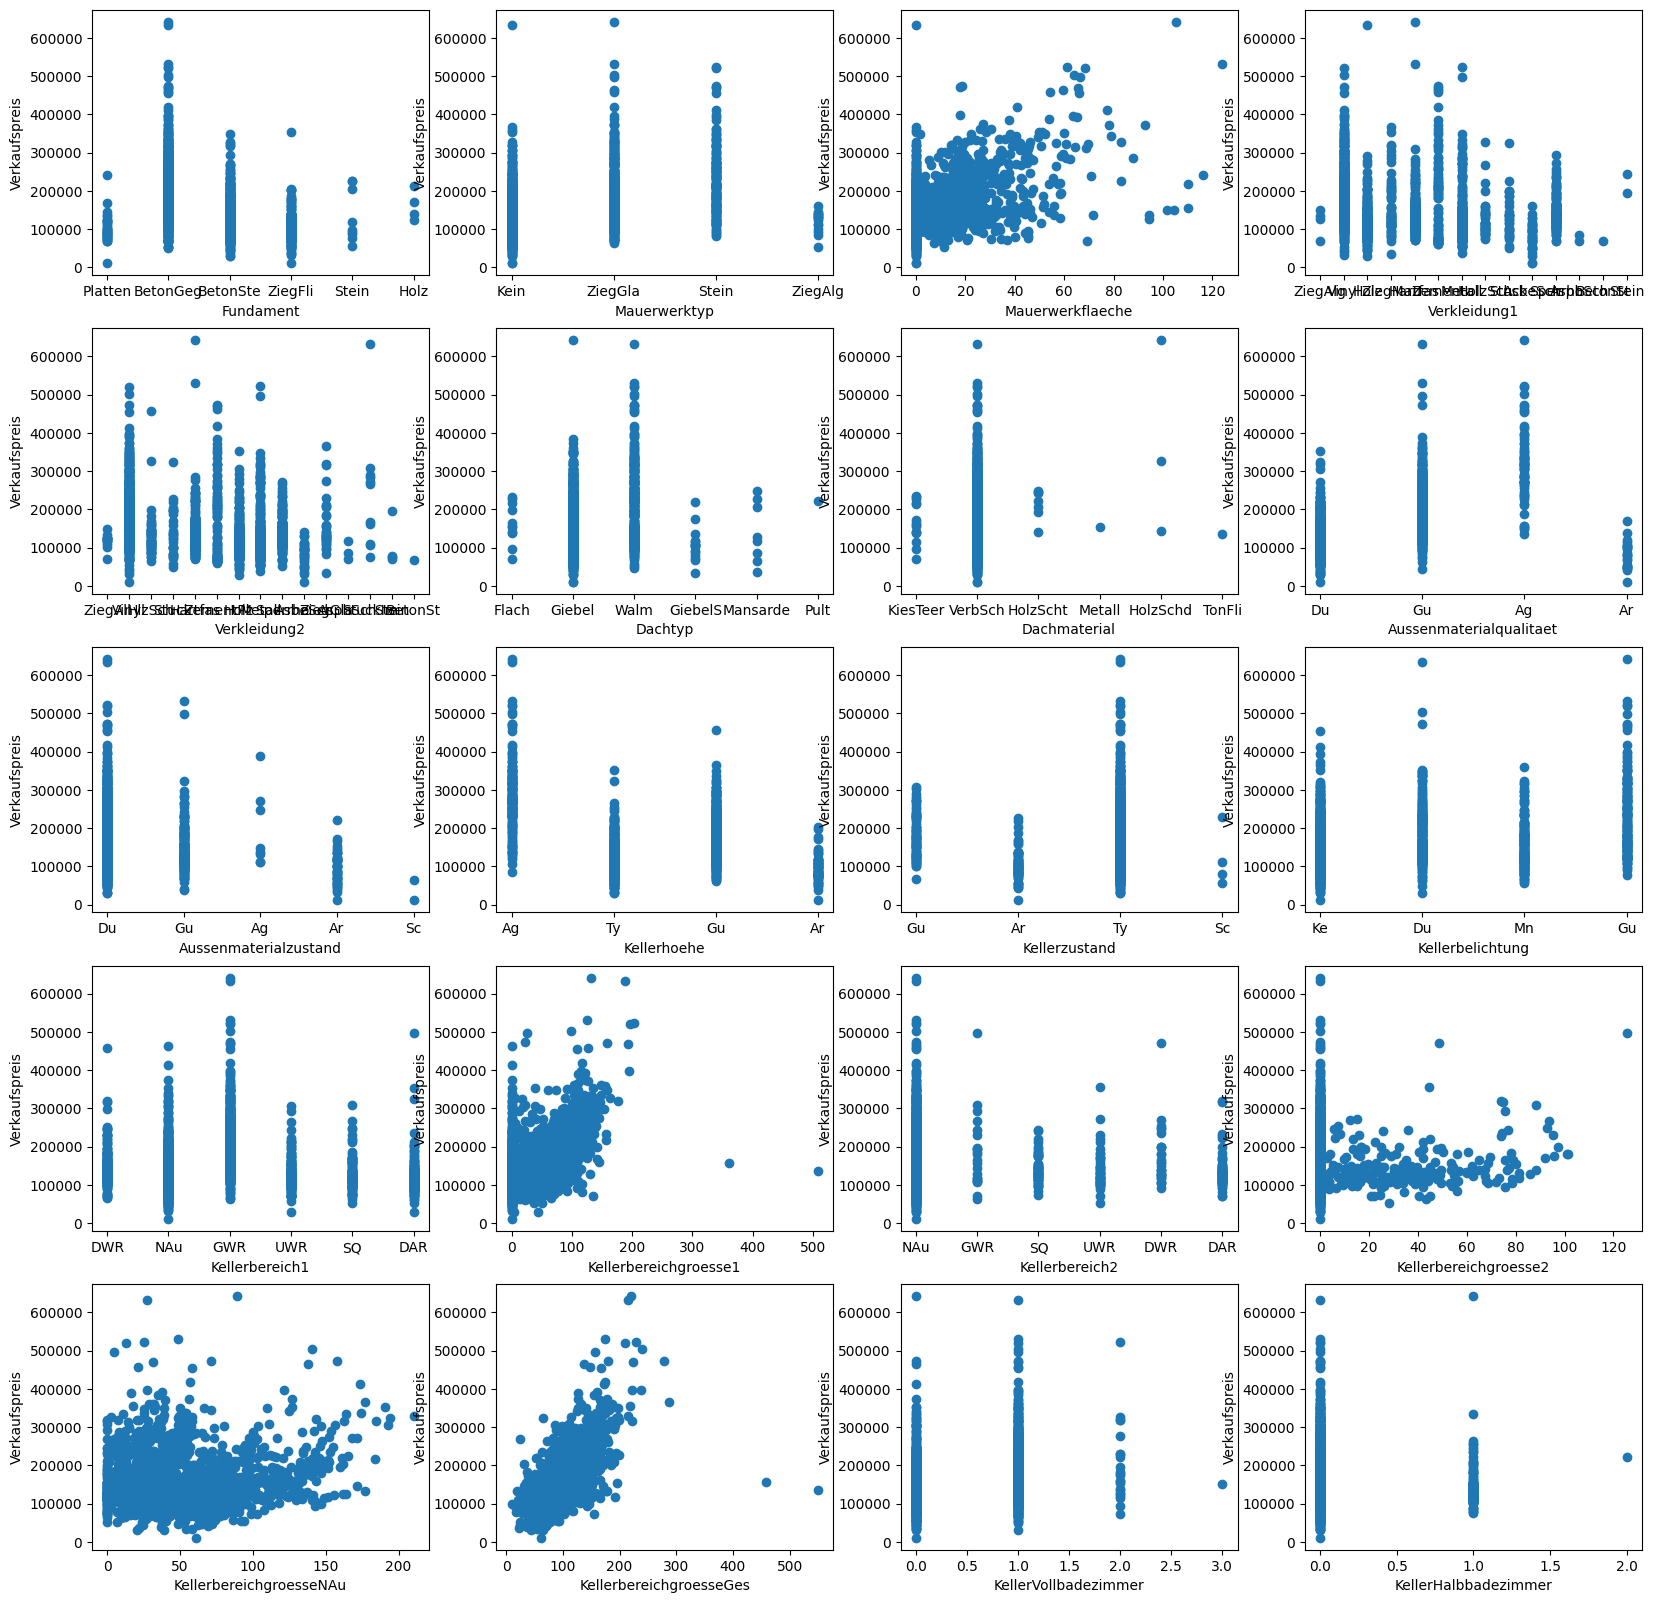

In [8]:
plot_all_features(df_20_2)

In [9]:
def drawbox_all(df):
    plt.figure(figsize=(20, 20))
    # get only numeric features
    df = df.select_dtypes(include=['float64', 'int64'])
    for i, feature in enumerate(df.columns):
        # delete empty values
        df = df[df[feature].notnull()]
        try:
            plt.subplot(5, 4, i+1)
            plt.boxplot(df[feature])
            plt.xlabel(feature)
        except Exception as e:
            print(e)
    plt.show()
    

In [20]:
Q1 = df_20_2.quantile(0.25)
Q3 = df_20_2.quantile(0.75)
IQR = Q3 - Q1

# Ausreißer sind Werte, die unter Q1-1.5*IQR oder über Q3+1.5*IQR liegen
outliers = (df_20_2 < (Q1 - 1.5 * IQR)) | (df_20_2 > (Q3 + 1.5 * IQR))

print(outliers)

TypeError: unsupported operand type(s) for -: 'str' and 'str'

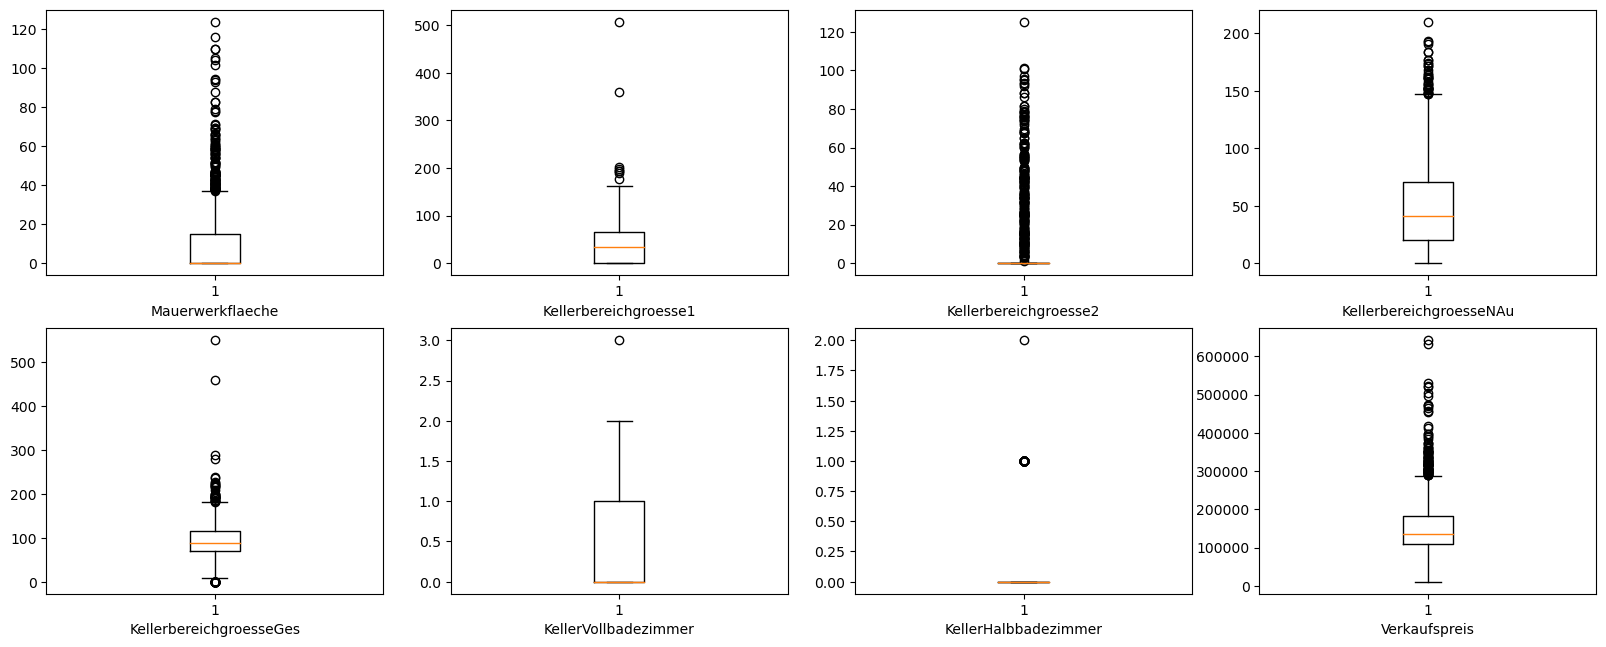

In [ ]:
drawbox_all(df_20_2)

In [ ]:
def calculate_correlation(df):
    df = df.select_dtypes(include=['float64', 'int64'])
    corr = df.corr()
    corr.style.background_gradient(cmap='coolwarm')
    return corr

In [ ]:
calculate_correlation(df_20_2)

,Mauerwerkflaeche,Kellerbereichgroesse1,Kellerbereichgroesse2,KellerbereichgroesseNAu,KellerbereichgroesseGes,KellerVollbadezimmer,KellerHalbbadezimmer,Verkaufspreis
Mauerwerkflaeche,1.000000,0.290041,0.001515,0.104695,0.395093,0.147556,0.015106,0.513073
Kellerbereichgroesse1,0.290041,1.000000,-0.039868,-0.457726,0.564568,0.632484,0.096986,0.443108
Kellerbereichgroesse2,0.001515,-0.039868,1.000000,-0.231715,0.099785,0.165763,0.080442,0.025036
KellerbereichgroesseNAu,0.104695,-0.457726,-0.231715,1.000000,0.407378,-0.383817,-0.095483,0.175611
KellerbereichgroesseGes,0.395093,0.564568,0.099785,0.407378,1.000000,0.336438,0.036461,0.627685
KellerVollbadezimmer,0.147556,0.632484,0.165763,-0.383817,0.336438,1.000000,-0.135017,0.282349
KellerHalbbadezimmer,0.015106,0.096986,0.080442,-0.095483,0.036461,-0.135017,1.000000,-0.010584
Verkaufspreis,0.513073,0.443108,0.025036,0.175611,0.627685,0.282349,-0.010584,1.000000


In [ ]:
def calculate_correlation_non_numeric(df):
    df = df.select_dtypes(exclude=['float64', 'int64'])
    # Convert non-numeric columns to ranks
    for col in df.columns:
        df[col] = df[col].rank(method='min')
    corr = df.corr(method='spearman')
    return corr

calculate_correlation_non_numeric(df_20_2)

,Fundament,Mauerwerktyp,Verkleidung1,Verkleidung2,Dachtyp,Dachmaterial,Aussenmaterialqualitaet,Aussenmaterialzustand,Kellerhoehe,Kellerzustand,Kellerbelichtung,Kellerbereich1,Kellerbereich2
Fundament,1.000000,-0.257425,-0.405769,-0.417279,-0.066451,-0.018187,-0.473779,0.058517,0.586439,-0.099027,0.190542,0.028123,0.025716
Mauerwerktyp,-0.257425,1.000000,0.005959,0.025619,0.227407,-0.025964,0.171469,-0.030250,-0.198898,0.080215,-0.170946,-0.089832,0.023059
Verkleidung1,-0.405769,0.005959,1.000000,0.870599,-0.003374,0.002562,0.315502,0.022968,-0.344138,0.044167,-0.110432,-0.013498,-0.055126
Verkleidung2,-0.417279,0.025619,0.870599,1.000000,0.001753,0.018578,0.321304,0.028162,-0.365419,0.035983,-0.115840,-0.035044,-0.041326
Dachtyp,-0.066451,0.227407,-0.003374,0.001753,1.000000,0.061487,-0.068158,-0.013429,-0.063585,0.022109,-0.058596,-0.035828,-0.033271
Dachmaterial,-0.018187,-0.025964,0.002562,0.018578,0.061487,1.000000,-0.005987,-0.012868,0.025863,0.025694,0.116507,-0.011512,0.086845
Aussenmaterialqualitaet,-0.473779,0.171469,0.315502,0.321304,-0.068158,-0.005987,1.000000,0.032990,-0.371512,0.060334,-0.113357,-0.003750,0.000529
Aussenmaterialzustand,0.058517,-0.030250,0.022968,0.028162,-0.013429,-0.012868,0.032990,1.000000,0.071005,-0.054028,0.025005,-0.036006,0.003114
Kellerhoehe,0.586439,-0.198898,-0.344138,-0.365419,-0.063585,0.025863,-0.371512,0.071005,1.000000,0.009277,0.219560,0.038760,0.015729
Kellerzustand,-0.099027,0.080215,0.044167,0.035983,0.022109,0.025694,0.060334,-0.054028,0.009277,1.000000,-0.028130,-0.087670,0.022679


In [ ]:
pd.get_dummies(df['Dachmaterial'])

,HolzSchd,HolzScht,KiesTeer,Metall,TonFli,VerbSch
Id,,,,,,
1,False,False,True,False,False,False
2,False,False,False,False,False,True
3,False,False,False,False,False,True
4,False,False,False,False,False,True
5,False,False,False,False,False,True
...,...,...,...,...,...,...
1996,False,False,False,False,False,True
1997,False,False,False,False,False,True
1998,False,False,False,False,False,True


In [ ]:
import pandas as pd

# Convert the categorical column to numerical
dummies = pd.get_dummies(df_20_2['Aussenmaterialzustand'])

# Add the dummy variables to your DataFrame
df_20_2 = pd.concat([df_20_2, dummies], axis=1)

# Now calculate the correlation for each dummy variable
for column in dummies.columns:
    correlation = df_20_2['Verkaufspreis'].corr(df_20_2[column])
    print(f"Correlation of Verkaufspreis with {column}: {correlation}")

Correlation of Verkaufspreis with Ag: 0.03605479544597006
Correlation of Verkaufspreis with Ar: -0.13437022522684297
Correlation of Verkaufspreis with Du: 0.10065227416242445
Correlation of Verkaufspreis with Gu: -0.0455555202220945
Correlation of Verkaufspreis with Sc: -0.05316933265399493


In [ ]:
import scipy.stats as stats

# Erstellen Sie eine Liste von 'Verkaufspreis'-Werten für jede Kategorie
values = [df_20_2.loc[df_20_2['Dachmaterial'] == category, 'Verkaufspreis'] for category in df_20_2['Dachmaterial'].unique()]

# Führen Sie die ANOVA durch
f_val, p_val = stats.f_oneway(*values)

print(f"F-Wert: {f_val}")
print(f"P-Wert: {p_val}")

F-Wert: 7.298783149376925
P-Wert: 8.697536832224511e-07


In [ ]:
df_20_2['Kellerbereichgroesse2'].value_counts()

Kellerbereichgroesse2
0.00     1769
26.46       4
33.66       3
15.12       3
53.64       2
         ... 
25.56       1
23.76       1
22.23       1
20.88       1
33.93       1
Name: count, Length: 198, dtype: int64

In [ ]:
df_20_2['Kellerbereich2'].value_counts()

Kellerbereich2
NAu    1707
DAR      73
SQ       58
UWR      46
DWR      30
GWR      23
Name: count, dtype: int64

In [ ]:
# count where Kellerbereich2 is NAu and Kellerbereichgroesse2 is zero
df_20_2[(df_20_2['Kellerbereich2'] != "NAu") & (df_20_2['Kellerbereichgroesse2'] == 0)].count()

Fundament                  62
Mauerwerktyp               62
Mauerwerkflaeche           62
Verkleidung1               62
Verkleidung2               62
Dachtyp                    62
Dachmaterial               62
Aussenmaterialqualitaet    62
Aussenmaterialzustand      62
Kellerhoehe                 0
Kellerzustand               0
Kellerbelichtung            0
Kellerbereich1              0
Kellerbereichgroesse1      62
Kellerbereich2              0
Kellerbereichgroesse2      62
KellerbereichgroesseNAu    62
KellerbereichgroesseGes    62
KellerVollbadezimmer       61
KellerHalbbadezimmer       61
Verkaufspreis              62
HolzSchd                   62
HolzScht                   62
KiesTeer                   62
Metall                     62
TonFli                     62
VerbSch                    62
dtype: int64

In [ ]:
df_20_2[df_20_2['Mauerwerktyp'].isnull()]

,Fundament,Mauerwerktyp,Mauerwerkflaeche,Verkleidung1,Verkleidung2,Dachtyp,Dachmaterial,Aussenmaterialqualitaet,Aussenmaterialzustand,Kellerhoehe,Kellerzustand,Kellerbelichtung,Kellerbereich1,Kellerbereichgroesse1,Kellerbereich2,Kellerbereichgroesse2,KellerbereichgroesseNAu,KellerbereichgroesseGes,KellerVollbadezimmer,KellerHalbbadezimmer,Verkaufspreis,HolzSchd,HolzScht,KiesTeer,Metall,TonFli,VerbSch
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,
18,BetonGeg,NaN,NaN,Vinyl,Vinyl,Giebel,VerbSch,Du,Du,Gu,Ty,Du,GWR,42.75,DWR,26.73,12.78,82.26,1.0,0.0,99662.50,False,False,False,False,False,True
219,BetonGeg,NaN,NaN,Vinyl,Vinyl,Giebel,VerbSch,Gu,Du,Gu,Ty,Ke,NAu,0.00,NAu,0.00,63.63,63.63,0.0,0.0,149600.00,False,False,False,False,False,True
340,BetonGeg,NaN,NaN,Zement,ZementPl,Giebel,VerbSch,Gu,Du,Gu,Ty,Ke,NAu,0.00,NAu,0.00,73.17,73.17,0.0,0.0,175057.50,False,False,False,False,False,True
390,BetonGeg,NaN,NaN,Vinyl,Vinyl,Giebel,VerbSch,Ag,Du,Ag,Gu,Gu,GWR,124.74,NAu,0.00,62.10,186.84,1.0,0.0,395250.00,False,False,False,False,False,True
453,BetonGeg,NaN,NaN,Vinyl,Vinyl,Giebel,VerbSch,Gu,Du,Gu,Ty,Ke,GWR,56.25,NAu,0.00,21.15,77.40,1.0,0.0,184025.00,False,False,False,False,False,True
746,BetonGeg,NaN,NaN,Vinyl,Vinyl,Giebel,VerbSch,Gu,Du,Gu,Ty,Ke,NAu,0.00,NAu,0.00,137.52,137.52,0.0,0.0,200494.60,False,False,False,False,False,True
853,BetonGeg,NaN,NaN,Vinyl,Vinyl,Giebel,VerbSch,Gu,Du,Ag,Ty,Ke,NAu,0.00,NAu,0.00,129.24,129.24,0.0,0.0,191250.00,False,False,False,False,False,True
856,BetonGeg,NaN,NaN,Vinyl,Vinyl,Giebel,VerbSch,Gu,Du,Gu,Ty,Ke,NAu,0.00,NAu,0.00,75.60,75.60,0.0,0.0,168725.00,False,False,False,False,False,True
1321,BetonGeg,NaN,NaN,Vinyl,Vinyl,Giebel,VerbSch,Gu,Du,Ag,Gu,Ke,GWR,140.58,NAu,0.00,9.72,150.30,1.0,0.0,286297.00,False,False,False,False,False,True


In [ ]:
df_20_2[df_20_2["Kellerbelichtung"].isnull()]

,Fundament,Mauerwerktyp,Mauerwerkflaeche,Verkleidung1,Verkleidung2,Dachtyp,Dachmaterial,Aussenmaterialqualitaet,Aussenmaterialzustand,Kellerhoehe,Kellerzustand,Kellerbelichtung,Kellerbereich1,Kellerbereichgroesse1,Kellerbereich2,Kellerbereichgroesse2,KellerbereichgroesseNAu,KellerbereichgroesseGes,KellerVollbadezimmer,KellerHalbbadezimmer,Verkaufspreis,HolzSchd,HolzScht,KiesTeer,Metall,TonFli,VerbSch
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,Platten,Kein,0.00,ZiegAlg,ZiegAll,Flach,KiesTeer,Du,Du,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.00,0.00,0.0,0.0,69700.00,False,False,True,False,False,False
28,Platten,Kein,0.00,HolzSch,HlzSch,Giebel,VerbSch,Du,Du,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.00,0.00,0.0,0.0,83300.00,False,False,False,False,False,True
47,BetonSte,Kein,0.00,Sperrho,Sperrho,Giebel,VerbSch,Du,Gu,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.00,0.00,0.0,0.0,69105.00,False,False,False,False,False,True
78,BetonSte,Kein,0.00,Holz,Holz,Giebel,VerbSch,Du,Du,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.00,0.00,0.0,0.0,130475.00,False,False,False,False,False,True
106,Platten,Kein,0.00,Hartfas,Hartfas,Giebel,VerbSch,Du,Ar,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.00,0.00,0.0,0.0,101119.40,False,False,False,False,False,True
117,Platten,Kein,0.00,ZiegMau,Holz,Giebel,VerbSch,Du,Du,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.00,0.00,0.0,0.0,93415.00,False,False,False,False,False,True
177,Platten,ZiegGla,45.00,Hartfas,Hartfas,Giebel,VerbSch,Gu,Du,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.00,0.00,0.0,0.0,168725.00,False,False,False,False,False,True
212,BetonSte,Kein,0.00,AsphSch,AsphSch,Walm,VerbSch,Du,Du,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.00,0.00,0.0,0.0,85000.00,False,False,False,False,False,True
221,Platten,Kein,0.00,Hartfas,Hartfas,Giebel,VerbSch,Du,Du,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.00,0.00,0.0,0.0,101029.30,False,False,False,False,False,True


In [ ]:


non_numeric = pd.to_numeric(df_20_2['KellerHalbbadezimmer'], errors='coerce').isna().sum()
if non_numeric > 0:
    print(f"{non_numeric} non-numeric values found in KellerHalbbadezimmer")
else:
    print("All values in KellerHalbbadezimmer are numeric")
# check if KellerHalbbadezimmer has not numeric values
df_20_2["KellerHalbbadezimmer"].value_counts() # -> all values are numeric


2 non-numeric values found in KellerHalbbadezimmer


KellerHalbbadezimmer
0.0    1886
1.0     111
2.0       1
Name: count, dtype: int64

In [19]:
df_20_3[(df_20_3['Kamine'] == 0) & (df_20_3['Kaminqualitaet'].isnull())]

,OberirdischeWohnflaeche,1Stockflaeche,2Stockflaeche,GeringequalitaetFlaeche,OberirdischeRaueme,Funktionalitaet,OberirdischeVollbadezimmer,OberirdischeHalbbadezimmer,Schlafzimmer,Kuechen,KuechenQualitaet,Kamine,Kaminqualitaet,Heizung,Heizungsqualitaet,Klimalanlage,Elektrik,Holzdeckflaeche,OffeneVerandaflaeche,GeschlosseneVerandaflaeche,Verkaufspreis
Id,,,,,,,,,,,,,,,,,,,,,
1,84.96,84.96,0.00,0.0,4,Ger1,1,0,2,1,Ar,0,NaN,GasWD,Ar,N,SichAr,0.00,0.00,0.0,69700.0
2,98.10,98.10,0.00,0.0,5,Typ,1,1,2,1,Du,0,NaN,GasWO,Gu,J,SLSRo,0.00,4.41,0.0,133450.0
7,78.12,78.12,0.00,0.0,6,Typ,1,0,2,1,Du,0,NaN,GasWO,Gu,J,SLSRo,12.42,0.00,0.0,101915.0
10,103.86,71.64,32.22,0.0,7,Typ,1,0,3,1,Gu,0,NaN,GasWO,Gu,J,SLSRo,0.00,8.64,0.0,106675.0
14,144.99,70.56,74.43,0.0,6,Typ,2,1,3,1,Gu,0,NaN,GasWO,Ag,J,SLSRo,12.96,3.24,0.0,166430.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,111.24,54.00,57.24,0.0,4,Typ,2,1,2,1,Gu,0,NaN,GasWO,Ag,J,SLSRo,0.00,14.94,0.0,129200.0
1994,78.48,78.48,0.00,0.0,5,Typ,1,0,3,1,Du,0,NaN,GasWO,Du,J,SLSRo,0.00,0.00,0.0,104550.0
1995,88.92,88.92,0.00,0.0,6,Typ,1,0,3,1,Du,0,NaN,GasWO,Du,J,SLSRo,0.00,7.20,0.0,101150.0


In [ ]:
# correlation between Fläche